# **Heart Attack Prediction using the KNN Classifier** ![Heart Emoji](https://emojipedia-us.s3.dualstack.us-west-1.amazonaws.com/thumbs/120/apple/285/heavy-black-heart_2764.png)


## **Introduction**

Welcome to my Heart Attack Prediction Classification Project! In this notebook, I apply predictive analytics to healthcare. The focus of this project is on predicting the likelihood of a heart attack based on a set of features and patient information.

**Objective:**
The primary objective of this project is to build a generalized classification model that can accurately distinguish between individuals who are prone to a heart attack and those who are not. By making use of machine learning techniques, this project aims to contribute to early detection and proactive healthcare interventions.

**Dataset:**
This project uses a dataset containing various health-related features such as:
- Age `Age`
- Gender `Sex`
- Chest Pain Type `ChestPainType`
- Resting Blood Pressure `RestingBP`
- Cholesterol `Cholesterol`
- Fasting Blood Sugar `FastingBS`
- Resting ECG `RestingECG`
- Maximum Heart Rate `MaxHR`
- The presence of Exercise Angina `ExerciseAngina`
- ST Depression induced by exercise relative to rest `OldPeak`
- The slope of peak exercise ST Segment `STSlope`

**Approach:**
The approach of this project involves data exploration, preprocessing, and the implementation of K-Nearest Neighbors (KNN) for classification. I'll assess the performance of the Naive Bayes model,  assess its generalization, using K-Folds Cross Validation, and improve the model using Hyperparameter Tuning.

**Notebook Structure:**
1. **Data Exploration:** I try to understand the structure and characteristics of the dataset, identifying patterns, correlations, and potential challenges.
2. **Data Preprocessing:** Cleaning and transforming the data, according to my earlier exploration, to ensure it is suitable for model training.
3. **Model Building:** Implementing the KNN Classification algorithm. I will compare the accuracy of two KNN models. One trained using upsampled data, and another trained without upsampling.
4. **Model Evaluation:** Assessing model performance using metrics like accuracy, precision, recall, confusion matrix and ROC curves.
5. **Generalization** Assessing model generalization using K-Folds Cross Validation
6. **Hyperparameter Tuning** Improving the model by search for the optimal parameters.
7. **Retraining the Model** Retraining the model with the new parameters.
6. **Conclusion:** Summarizing findings, and suggesting potential areas for improvement.

Feel free to explore and learn from this project. Your feedback and insights are valuable as I work towards creating a more accurate and reliable machine learning.

**Data:** The dataset used in this project is the Heart Failure Prediction Dataset, originally obtained from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

Feel free to explore and learn from this project. Your feedback and insights are valuable as I work towards creating a more accurate and reliable ML models.

# Import Libraries

I'll import essential Python libraries for this project, including Numpy, Pandas, Seaborn, Matplotlib, and Sklearn.

- Pandas: Used for data importation and manipulation using data frames.
- Numpy: Employed for numerical calculations.
- Seaborn and Matplotlib: Use to create data visualizations.
- Sklearn: Employed to build and train predictive models.










In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Import Data

In [ ]:
df=pd.read_csv("heart.csv")

# Exploratory Data Analysis

## Viewing the Data
Let us see the first 5 rows of the dataset:

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


I will be inspecting this data to check for:
*   shape of the data
*   missing data
*   duplicate values
*   inconsistent data
*   mixed data types
*   distribution of the data
*   outliers
*   relationships among variables











## Check the Shape of the Data

Checking the number of rows and columns in the dataset:

In [ ]:
df.shape

(918, 12)

The data has 918 rows and 12 columns

## Checking Datatypes

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

ST_Slope, ExerciseAngina, RestingECG, Sex and ChestPainType are of the 'object' datatype and need to be converted to numeric.

## Check for Missing Values

In [ ]:
df.isnull().values.any() #using .isnull() to check for missing values

False

There are no missing values

## Check for Duplicate Values

I'll examine the dataset for duplicate values using the `.duplicated()` method. This method generates a series of `True` and `False` values, indicating whether each row is duplicated or not.

In [ ]:
duplicates = df[df.duplicated()]
if df[df.duplicated()].empty:
  print("There are no duplicates.") #Statement to be returned if there are no duplicates
else:
  print("Duplicates:",duplicates) #If there are duplicates, show the duplicates

There are no duplicates.


There are no duplicate values

## Check for Inconsistent Data

I'll inspect the categorical variables (Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope, FastingBS, and HeartDisease) to identify any inconsistent values. Utilizing the `.unique()` method, I can observe each unique value within a series, aiding in the detection of inconsistent, misspelled, or repetitive data.

In [ ]:
for col in df.columns: #Using a for-loop to check the unique values of multiple columns
  if (df[col].dtype==object)|(df[col].dtype==bool): #Checking the unique values of each categorical column using if-statement
    val=col
    print(f" {val}:",df[col].unique()) #printing the unique values for each column

 Sex: ['M' 'F']
 ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
 RestingECG: ['Normal' 'ST' 'LVH']
 ExerciseAngina: ['N' 'Y']
 ST_Slope: ['Up' 'Flat' 'Down']


## Check the Distribution of the Data

I'll be checking the distribution of the data as follows:
- the numerical data
- the categorical data
- the target column `HeartDisease`

### Numerical Data

I'll examine the distribution of numerical data using a histplot and create subplots for each numerical column using a for loop.

<Figure size 640x480 with 0 Axes>

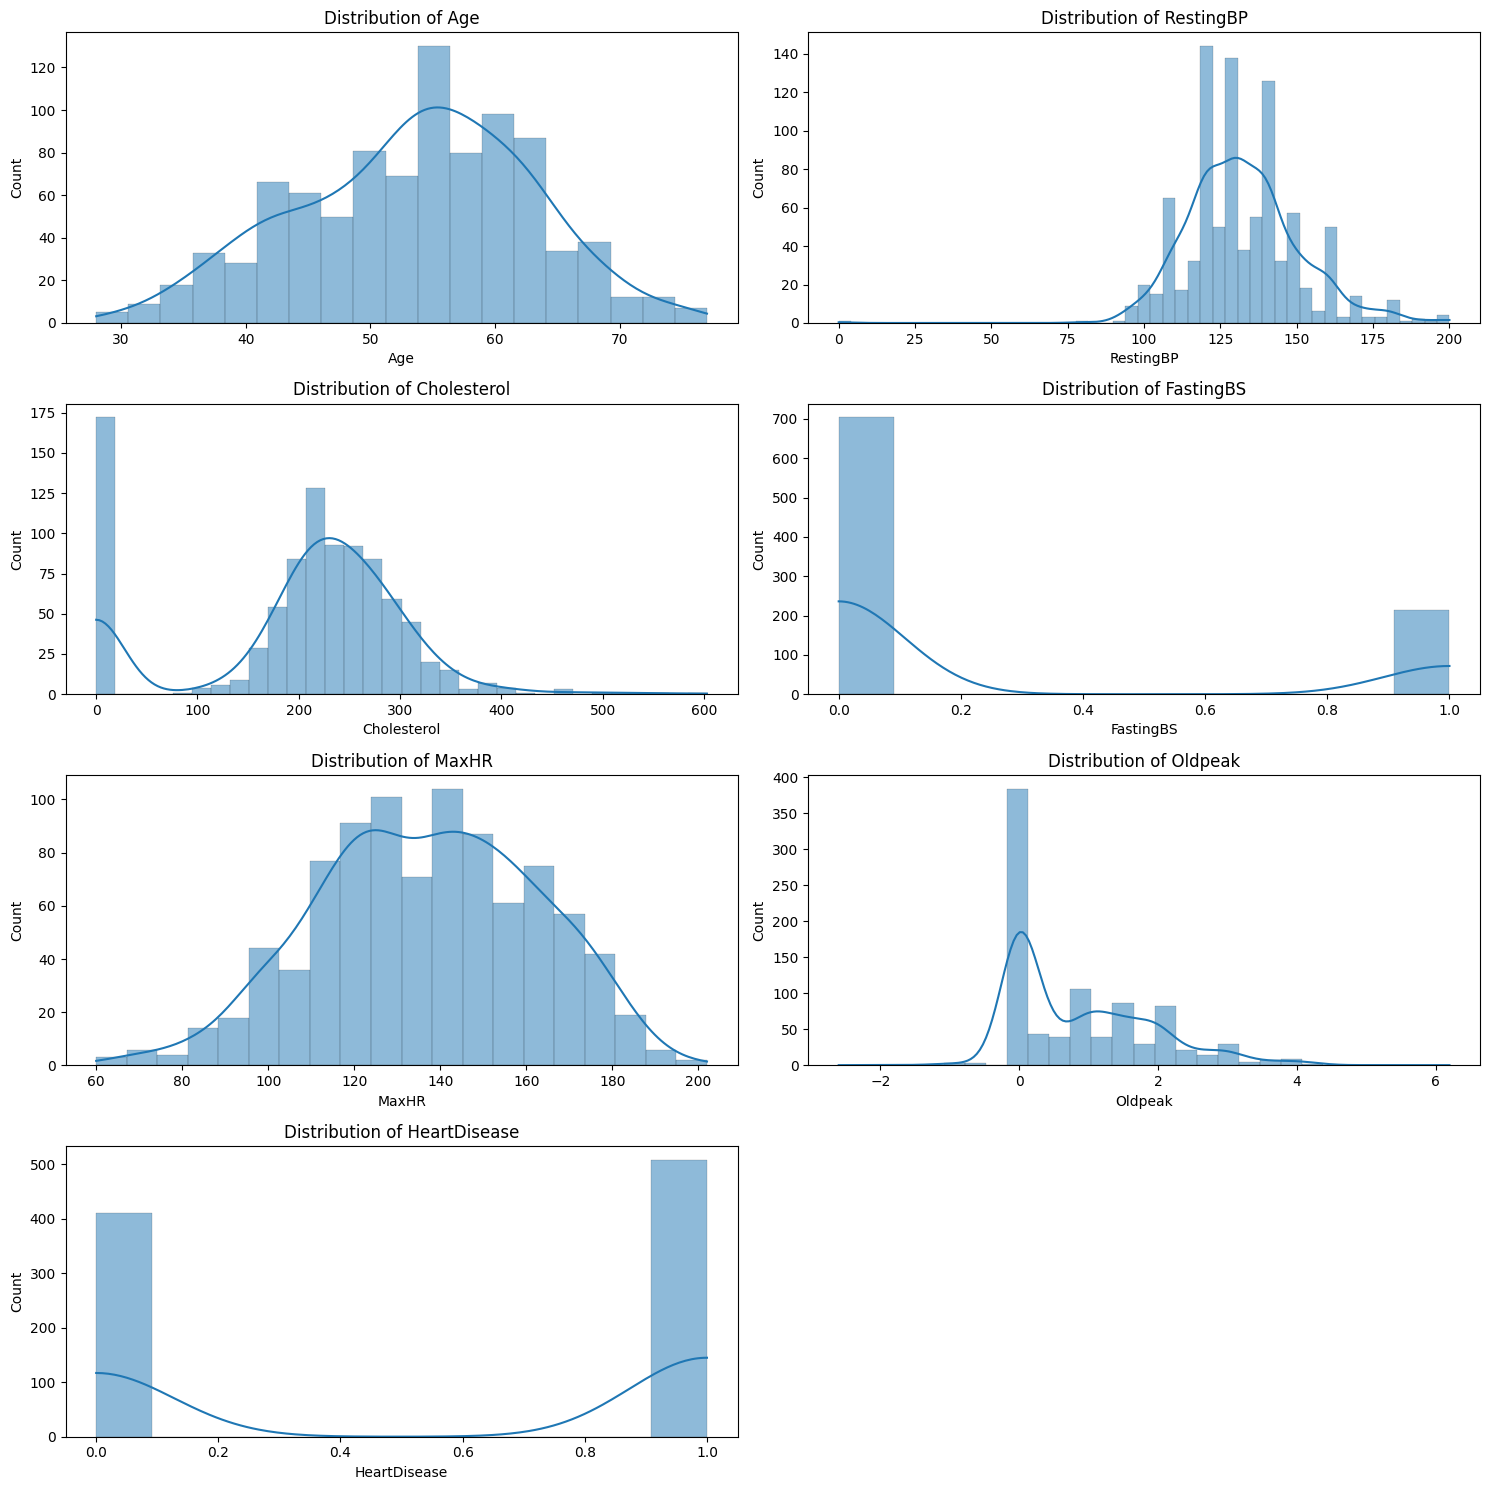

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

i = 1

# Adjusting subplot layout
plt.subplots_adjust(hspace=1.5)

# Creating a figure with specified size
plt.figure(figsize=(15, 15))

# Iterating through each column and plot histplots for numerical columns
for col in df.columns:
    if df[col].dtype in [int, float]:
        plt.subplot(4, 2, i)
        i += 1

        # Using seaborn's histplot for better aesthetics
        sns.histplot(df[col], kde=True, linewidth=0.1)

        plt.title(f"Distribution of {col}")
        plt.tight_layout()

# Show the plot
plt.show()


Checking the skewness of each of the above histplots using `.skew()`. Skewness measures the asymmetry or lack of symmetry in the distribution of data.

In [ ]:
for col in df.columns: #for multiple columns
  if (df[col].dtype==int)|(df[col].dtype==float): #for numerical columns
    print(f"{col}:\t",df[col].skew()) #print the skewness value


Age:	 -0.19593302867569365
RestingBP:	 0.1798393100516288
Cholesterol:	 -0.6100864307268192
FastingBS:	 1.2644841750727027
MaxHR:	 -0.14435941846180994
Oldpeak:	 1.0228720218107528
HeartDisease:	 -0.21508633825088655


- Fasting and Oldpeak are extremely right skewed, so we can expect these to have outliers.
- Cholestrol is moderately left skewed, so we can expect this to have outliers.

### Categorical Data

I'll examine the distribution of categorical data using a countplot. I'll create countplots for each categorical column using a for loop.

<Figure size 640x480 with 0 Axes>

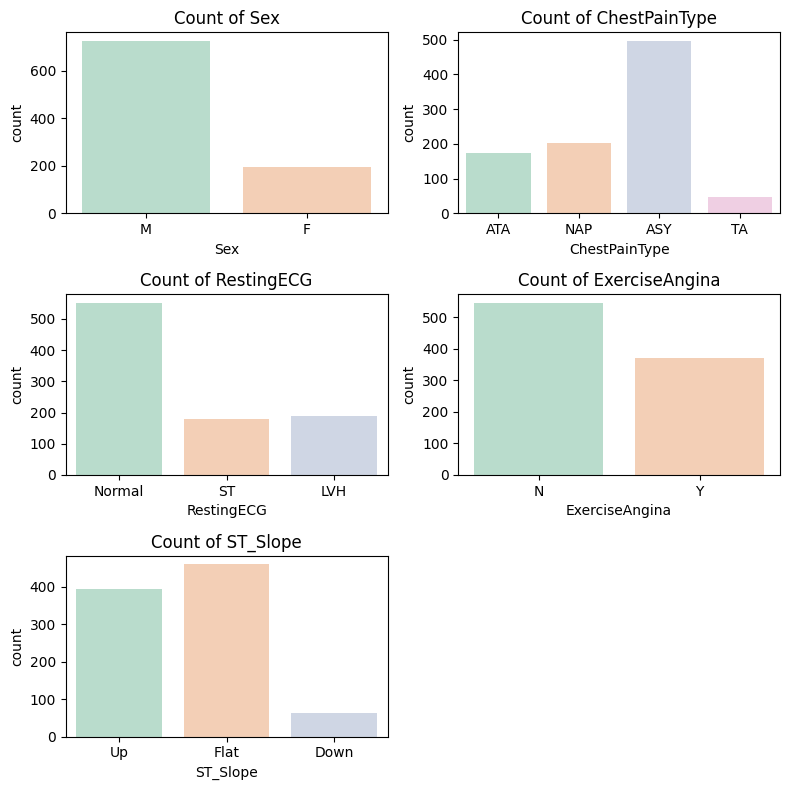

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

i = 1

# Adjusting subplot layout
plt.subplots_adjust(hspace=1.5)

# Creating a figure with specified size
plt.figure(figsize=(8, 8))

# Iterating through each column and plot count plots for categorical columns
for col in df.columns:
    if df[col].dtype in [bool, object]:
        plt.subplot(3, 2, i)
        i += 1

        # Using seaborn's countplot for better aesthetics
        sns.countplot(data=df, x=col, hue=col, palette='Pastel2', legend = False)

        plt.title(f"Count of {col}")
        plt.tight_layout()

# Show the plot
plt.show()


- There are a higher number of males than females
- ASY is the most common ChestPainType.
- Most patients have a normal resting ECG
- More patients have experienced exercise angina
- The lowest ST_Slope is 'Down'

### Target Column

I'll evaluate the distribution of the target column, currently labeled as an int type. To generate a bar chart visualizing the counts of each class, I'll convert the target variable to an object type.

Text(0.5, 1.0, 'Heart Disease?')

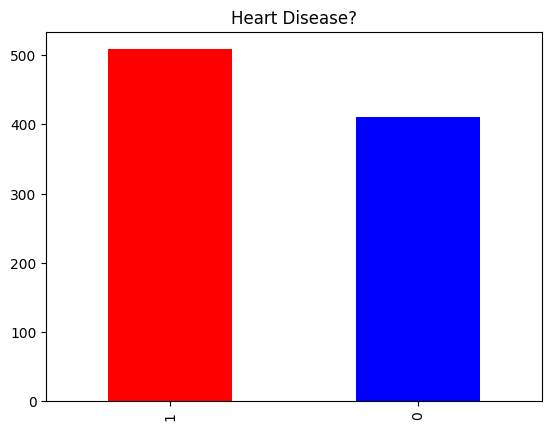

In [ ]:
data1=df.copy() #creating a new dataframe the same as df
data1['HeartDisease']=data1['HeartDisease'].astype(object) #converting the HeartDisease column to object type, so I can create a bar chart
data1.HeartDisease.value_counts().plot(kind='bar', color= ['red', 'blue']) #creating a bar chart using value_counts()
plt.title("Heart Disease?")

The plot shows that there are more people with heart Disease. I will now calculate the percentage proportion of patients that have and don't have heart disease to see if the data needs upsampling:

In [ ]:
#calculating percentage of patients with and without heart disease
total=(np.sum(data1.HeartDisease.value_counts().unique())) #calculating the total value counts
outcome=(data1.HeartDisease.value_counts().unique()) #calculating unique value_counts
print(f"{round((outcome[0]/total)*100,2)}% of patients do not have heart disease.") #showing the % without heart disease
print(f"{round((outcome[1]/total)*100,2)}% of patients have heart disease.") #showing the % with heart disease


55.34% of patients do not have heart disease.
44.66% of patients have heart disease.


The target column exhibits a slight imbalance. Typically, a dataset is deemed imbalanced if the target column has approximately 90% of datapoints in one class and 10% in another class. In our dataset, the target variable comprises around 55% of data in one class and about 45% in another class. This indicates a relatively balanced distribution between the classes. Consequently, applying an upsampling method may not significantly impact the classification results, given the minimal difference between the classes.

## Check for Outliers

I'll examine the presence of outliers in numerical variables using a boxplot. Boxplots provide a visual representation of outliers, often depicted as hollow circles beyond the whiskers.

<function matplotlib.pyplot.show(close=None, block=None)>

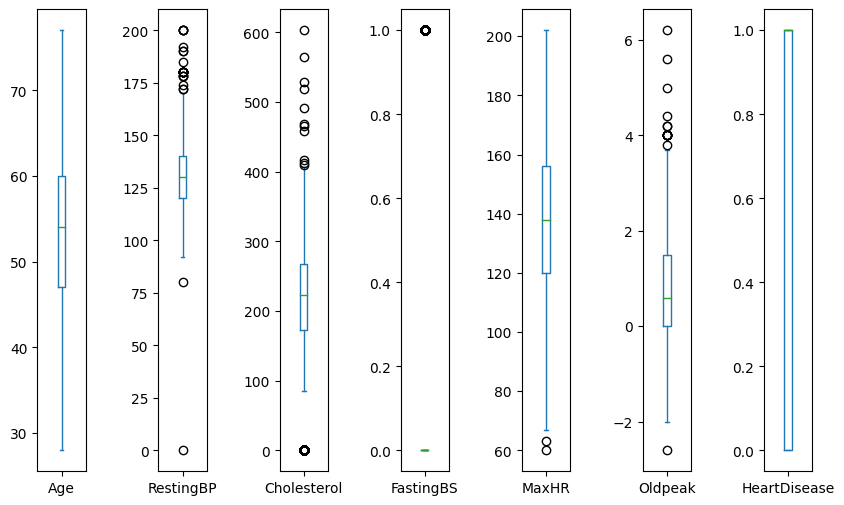

In [ ]:
df.plot(kind='box',subplots=True, sharey=False, figsize=(10,6))
plt.subplots_adjust(wspace=1.5)
plt.show

As shown by these boxplots, `RestingBP`, `Cholesterol`, `FastingBS`, `MaxHR` and `Oldpeak` all have outliers.



# Data Preprocessing


The data preprocessing will consist of:
- Removing Outliers
- Converting categorical data to numeric data
- Checking Multicollinearity

## Remove Outliers

I'll employ the Interquartile Range (IQR) method to remove outliers. The IQR helps calculate upper or lower limits, allowing the identification and removal of outliers beyond these limits. As illustrated in the boxplot below, outliers are observed in the upper limit, necessitating their removal.

<function matplotlib.pyplot.show(close=None, block=None)>

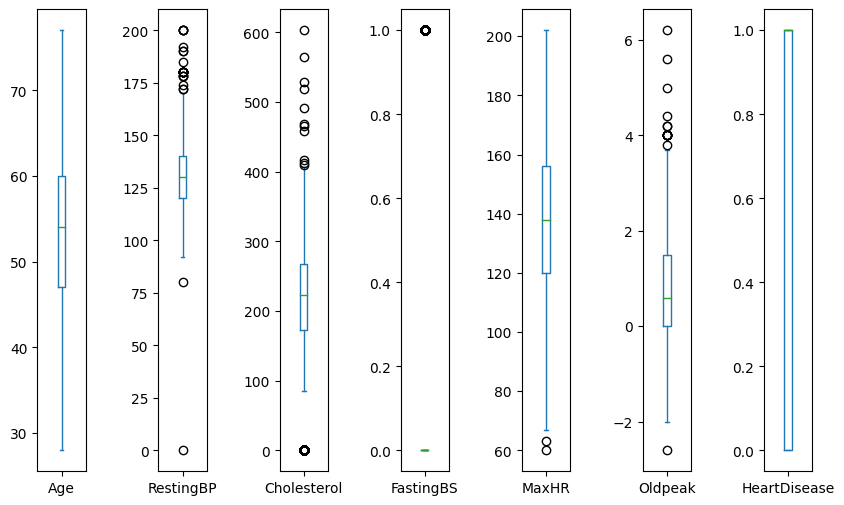

In [ ]:
df.plot(kind='box',subplots=True, sharey=False, figsize=(10,6))
plt.subplots_adjust(wspace=1.5)
plt.show

Removing outliers:

In [ ]:
for col in df.columns.drop(['HeartDisease','FastingBS' ]): #dropping discrete numerical variables
  if (df[col].dtype==int) | (df[col].dtype==float):
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 -Q1
    #Upper and lower quartile
    upper = Q3 +1.5*IQR
    lower = Q1 -1.5*IQR
    #Upper and lower quartile
    upper_values=np.where(df[col]>=upper)
    lower_values=np.where(df[col]<=lower)
    #Drop values over the limits
    df.drop(df[ (df[col] >= upper) | (df[col] <= lower) ].index , inplace=True)

The outliers above the upper limit for each column have been removed, as shown in the below boxplots:

<function matplotlib.pyplot.show(close=None, block=None)>

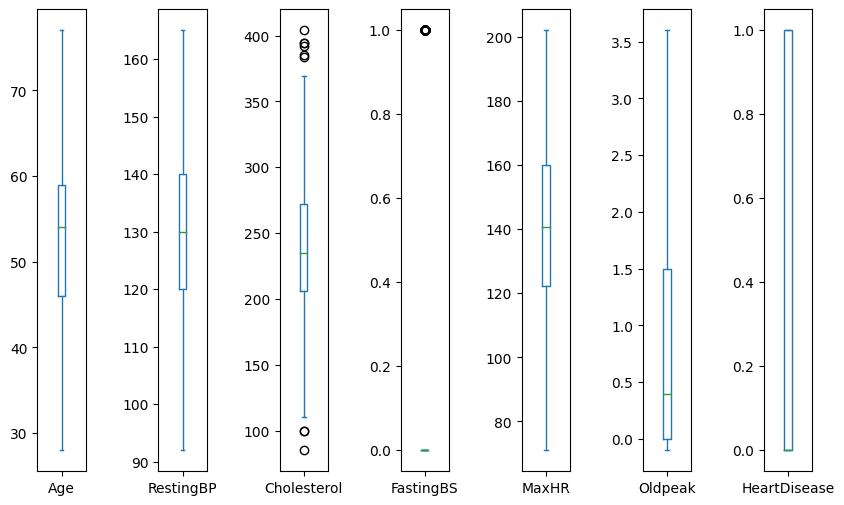

In [ ]:
df.plot(kind='box',subplots=True, sharey=False, figsize=(10,6))
plt.subplots_adjust(wspace=1.5)
plt.show

Looking at the shape of the new dataframe:

In [ ]:
df.shape

(690, 12)

There are now 690 rows.

## Converting Data to Numeric

I'll convert the following categorical variables into numeric form:

- Sex
- ChestPainType
- RestingECG
- ExerciseAngina
- ST_Slope

For nominal variables (Sex, ExerciseAngina, ST_Slope), I'll use the `get_dummies` method.

For ordinal variables (ChestPainType, RestingECG), I'll use the `OrdinalEncoder` to perform the conversion.

### Nominal Data
Converting (Sex, ExerciseAngina, ST_Slope) using `get_dummies`:


In [ ]:
df_new=pd.get_dummies(data=df, columns=['Sex','ExerciseAngina','ST_Slope'])
df_new.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,ATA,140,289,0,Normal,172,0.0,0,0,1,1,0,0,0,1
1,49,NAP,160,180,0,Normal,156,1.0,1,1,0,1,0,0,1,0
2,37,ATA,130,283,0,ST,98,0.0,0,0,1,1,0,0,0,1
3,48,ASY,138,214,0,Normal,108,1.5,1,1,0,0,1,0,1,0
4,54,NAP,150,195,0,Normal,122,0.0,0,0,1,1,0,0,0,1


### Categorical Data
Converting ChestPainType and RestingECG using `OrdinalEncoder()`:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df_new[["ChestPainType", "RestingECG"]])
df_new[["ChestPainType", "RestingECG"]] = enc.transform(df_new[["ChestPainType", "RestingECG"]])

Seeing the new dataframe

In [ ]:
df_new.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1.0,140,289,0,1.0,172,0.0,0,0,1,1,0,0,0,1
1,49,2.0,160,180,0,1.0,156,1.0,1,1,0,1,0,0,1,0
2,37,1.0,130,283,0,2.0,98,0.0,0,0,1,1,0,0,0,1
3,48,0.0,138,214,0,1.0,108,1.5,1,1,0,0,1,0,1,0
4,54,2.0,150,195,0,1.0,122,0.0,0,0,1,1,0,0,0,1


## Check Multicollinearity
Multicollinearity, often referred to as the dummy variable trap, arises when independent variables exhibit high correlation with each other. This correlation indicates a situation where one variable can be predicted from another, introducing redundancy in the model.

<Axes: >

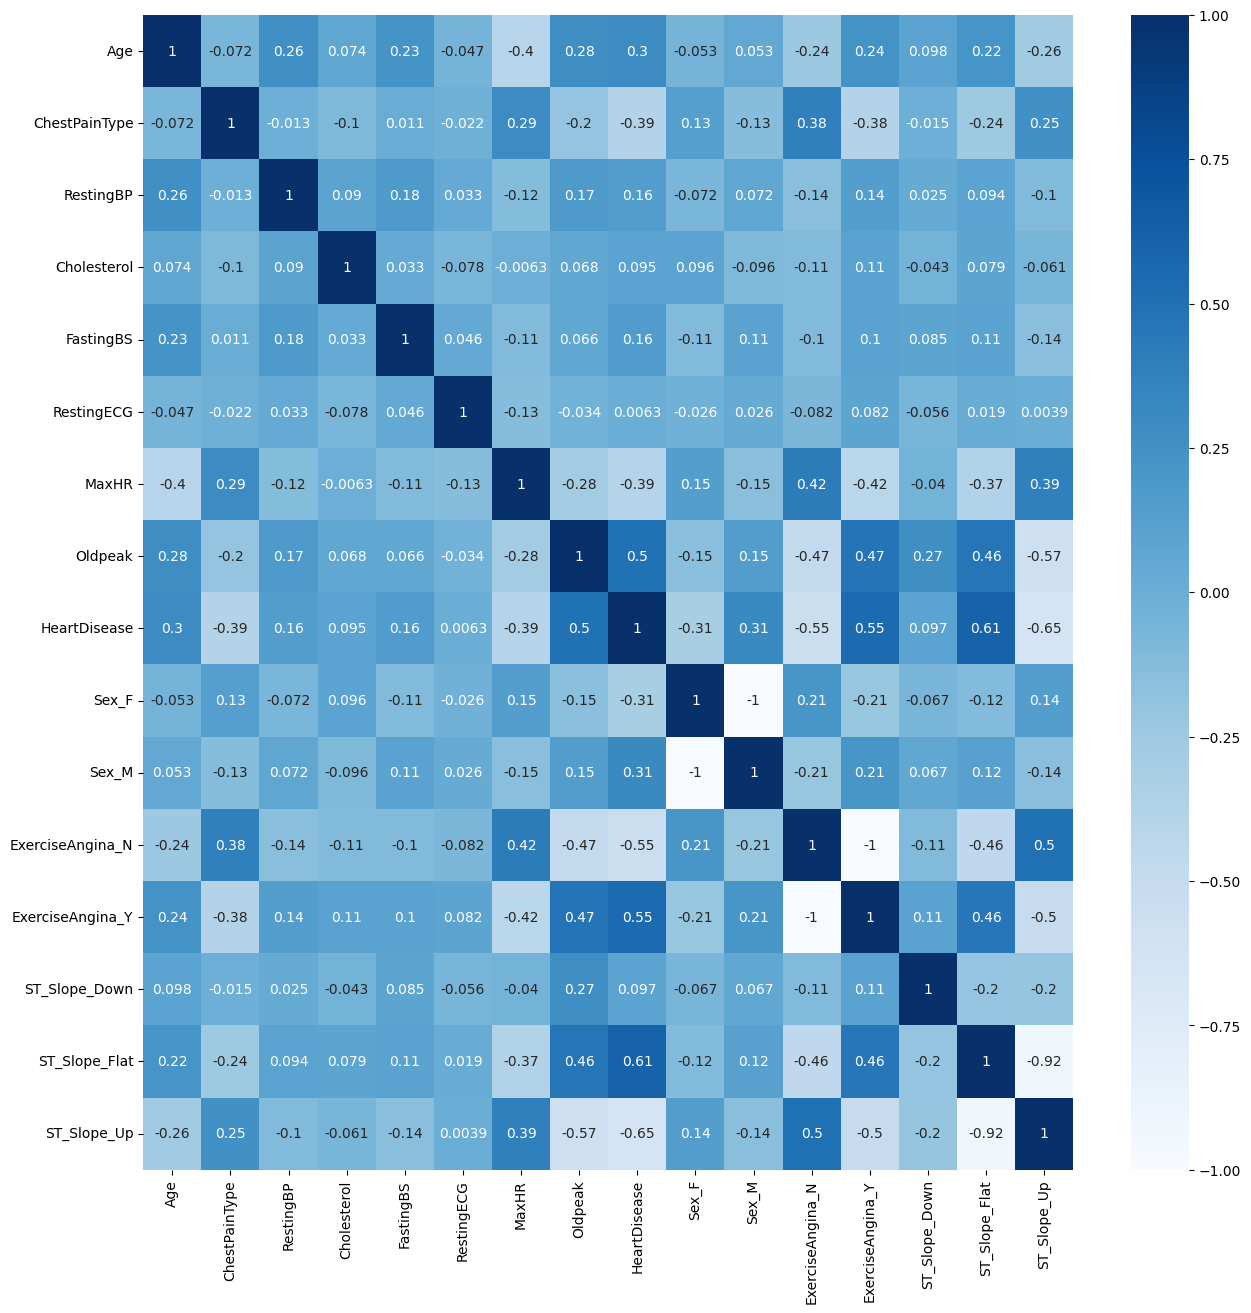

In [ ]:
correl=df_new.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correl, annot=True, cmap='Blues')

There are a few strong correlations:
- `Sex_F` and `Sex_M`,
- `ExerciseAngina_Y` and `ExerciseAngina_N`,
- `ST_Slope_Down`, `ST_Slope_Up`, `ST_Slope_Flat`

Keeping these variables could lead to multicollinearity. Thus, I'll drop one of the columns in each group of variables to prevent multicollinearity.

In [ ]:
df_new.drop(['Sex_M','ST_Slope_Flat', 'ExerciseAngina_Y'], axis=1, inplace=True )

# Scale KNN

Features with a larger range of values can dominate features with smaller range of values, hence we have to scale the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df_new)

array([[-1.3326408 ,  0.14766611,  0.6207857 , ...,  0.76802458,
        -0.20945864,  1.02643628],
       [-0.3825031 ,  1.19807451,  1.98341378, ...,  0.76802458,
        -0.20945864, -0.9742446 ],
       [-1.64935337,  0.14766611, -0.06052833, ...,  0.76802458,
        -0.20945864,  1.02643628],
       ...,
       [ 0.46206375, -0.90274229, -0.06052833, ..., -1.30204167,
        -0.20945864, -0.9742446 ],
       [ 0.46206375,  0.14766611, -0.06052833, ...,  0.76802458,
        -0.20945864, -0.9742446 ],
       [-1.54378251,  1.19807451,  0.4845229 , ...,  0.76802458,
        -0.20945864,  1.02643628]])

# Split Data

Using train_test_split, I'll be splitting data into four parts:


*   Independent variables of the training set
*   Dependent variable of the training set


*   Independent variables of the test set
*   Dependent variable of the test set

In [ ]:
from sklearn.model_selection import train_test_split
X = df_new.drop('HeartDisease', axis=1)
y = df_new['HeartDisease']
(X_train, X_test, y_train, y_test)= train_test_split(X,y, test_size=0.25, random_state=42) #random_state=42 to get the same result for each run

# Model Building
I'll be building my model using two approaches:
1. KNN without Upsampling
2. KNN with upsampling (using Smote)



## KNN Classification without Upsampling
**Building the KNN Model:**

In [ ]:
#Importing KNN
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=10,metric='euclidean')

#Fitting the Model
kn.fit(X_train, y_train)

#Making Predictions
kn_train_pred = kn.predict(X_train)
kn_test_pred = kn.predict(X_test)

#Displaying Predictions
print("Training Accuracy:", kn.score(X_train,y_train))
knn_score=kn.score(X_test, y_test)
print("Test Accuracy:", kn.score(X_test, y_test))

Training Accuracy: 0.7330754352030948
Test Accuracy: 0.653179190751445


The training accuracy is higher than the test accuracy, suggesting that the model is overfitting.

**Confusion Matrix**

array([[238,  47],
       [ 91, 141]])

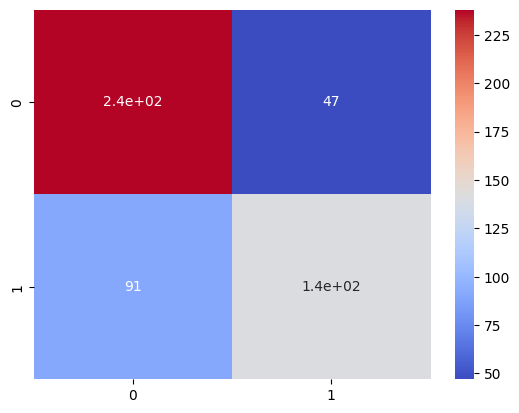

In [ ]:
from sklearn import metrics
cm_kn=metrics.confusion_matrix(y_train,kn_train_pred)
sns.heatmap(cm_kn, annot=True, cmap="coolwarm")
cm_kn

There are:
- 238 True Positives
- 47 False Positives
- 91 False Negatives
- 141 True Negatives

There is a higher number of true positives and true negatives, suggesting that the model is making mostly accurate predictions. However, there is still a high number false positive and false negative, suggesting need for improvement.

**Classification Report**

In [ ]:
#classification report
from sklearn import metrics
cr_kn= metrics.classification_report(y_train,kn_train_pred)
print(cr_kn)

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       285
           1       0.75      0.61      0.67       232

    accuracy                           0.73       517
   macro avg       0.74      0.72      0.72       517
weighted avg       0.74      0.73      0.73       517



The f1-score is a composite metric that considers both precision and recall, providing an overall assessment of a model's performance. A higher f1-score, closer to 1, suggests that both precision and recall are high. As anticipated from the accuracy scores, the f1-score of 0.73 implies that the model might not be effectively generalizing to new, unseen data. This emphasizes the importance of evaluating multiple metrics to gain a comprehensive understanding of the model's performance.

**ROC Curve**

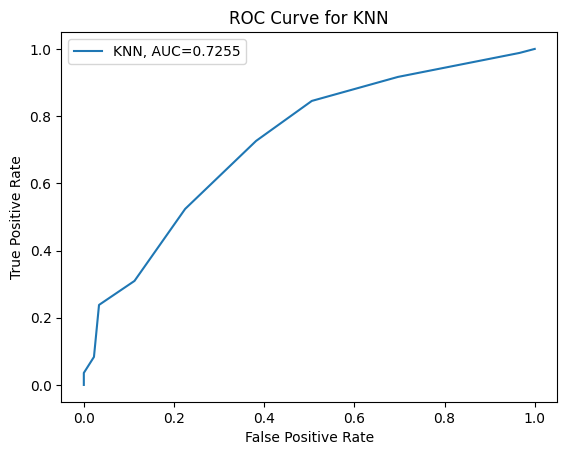

In [ ]:
y_pred_kn = kn.predict_proba(X_test)[::,1] #predict_proba gives probabilities for the target variable
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_kn)
auc = round(metrics.roc_auc_score(y_test, y_pred_kn), 4) #calculating the auc score
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

#create ROC curve
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve for KNN")
plt.legend()

The AUC Score is 0.72, suggesting that the model is not performing well enough in classifying the data.


## KNN Model with Upsampling.

To address imbalance in the data, I'll be using upsampling on the minority class. The method I'll be using for upsampling is SMOTE. the SMOTE (Synthetic Minority Over-sampling Technique) technique to address class imbalance in a machine learning dataset.
- First I have to install SMOTE and imblearn.
- Then I have to import SMOTE

In [ ]:
#installing SMOTE
!pip install SMOTE
! pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) #fitting data with smote


**Building the KNN w/SMOTE Model**

In [ ]:
#Importing knn
knn_sm = KNeighborsClassifier()

#Fitting KNN to the Upsampled Data
knn_sm.fit(X_train_res, y_train_res.ravel())

#Making Predictions
SM_test_pred = knn_sm.predict(X_test)
SM_train_pred = knn_sm.predict(X_train_res)

#Displaying the Prediction Accuracy
print("Training Accuracy:", knn_sm.score(X_train_res,y_train_res))
knn_sm_score=knn_sm.score(X_test, y_test)
print("Test Accuracy:", knn_sm.score(X_test, y_test))

# Printing the Classification Report
print(metrics.classification_report(y_test, SM_test_pred))

Training Accuracy: 0.7614035087719299
Test Accuracy: 0.7052023121387283
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        89
           1       0.69      0.73      0.71        84

    accuracy                           0.71       173
   macro avg       0.71      0.71      0.71       173
weighted avg       0.71      0.71      0.71       173



Both the test and training accuracies have improved, and overfitting has slightly improved. This shows a slight improvement of accuracy from applying upsampling to the data.

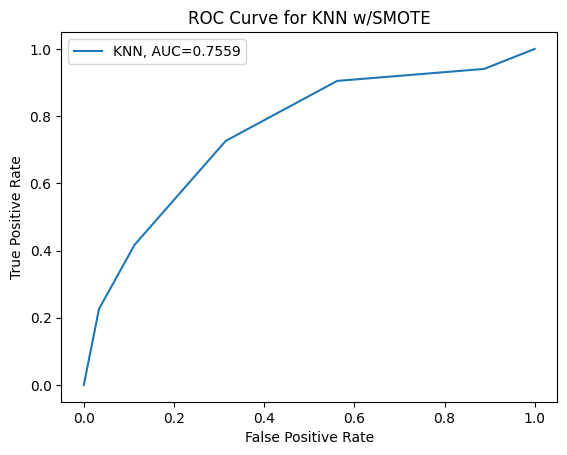

In [ ]:
y_pred_knn_sm = knn_sm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_knn_sm)
auc = round(metrics.roc_auc_score(y_test, y_pred_knn_sm), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

#create ROC curve
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve for KNN w/SMOTE")
plt.legend()

The AUC value is has improved slightly, suggesting better prediction accuracy when upsampling is applied.

# Cross Validation - Checking Generalization









In [ ]:
#KNN - cross-validation
from sklearn.model_selection import cross_val_score
cv_kn = cross_val_score(kn, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-validation scores: {}".format(cv_kn))
print("Average Cross validation Score: {:.2f}".format(cv_kn.mean()))

Cross-validation scores: [0.51923077 0.73076923 0.67307692 0.76923077 0.71153846 0.59615385
 0.63461538 0.60784314 0.7254902  0.70588235]
Average Cross validation Score: 0.67


In [ ]:
#KNN w/SMOTE - cross-validation
from sklearn.model_selection import cross_val_score
cv_kn_sm = cross_val_score(knn_sm, X_train_res, y_train_res, cv=10, scoring='accuracy')
print("Cross-validation scores: {}".format(cv_kn_sm))
print("Average Cross validation Score: {:.2f}".format(cv_kn_sm.mean()))

Cross-validation scores: [0.64912281 0.64912281 0.78947368 0.59649123 0.70175439 0.59649123
 0.64912281 0.61403509 0.75438596 0.75438596]
Average Cross validation Score: 0.68


In [ ]:
#Displaying the Scores for each model in a dataframe
cv_results = {'Model': ['KNN','KNN w/SMOTE' ],
        'Avg. CV Score': [np.mean(cv_kn), np.mean(cv_kn_sm)]
        }

pd.DataFrame(cv_results)

,Model,Avg. CV Score
0,KNN,0.667383
1,KNN w/SMOTE,0.675439


After applying upsampling, the model's generalization has barely improved. Hence it can be assumed that a slight imbalance in the data does not have severe impact on a model's accuracy.

## Comparing with ROC Curves

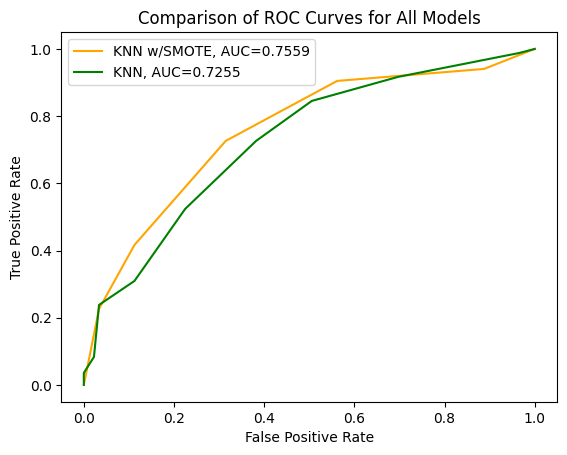

In [ ]:
#set up plotting area
plt.figure(0).clf()

#KNN with SMOTE
y_pred_knn_sm = knn_sm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_knn_sm)
auc1 = round(metrics.roc_auc_score(y_test, y_pred_knn_sm), 4)
plt.plot(fpr,tpr,label="KNN w/SMOTE, AUC="+str(auc1), color='orange')

#KNN
y_pred_kn = kn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_kn)
auc4 = round(metrics.roc_auc_score(y_test, y_pred_kn), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc4), color='g')

#title
plt.title("Comparison of ROC Curves for All Models")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#add legend
plt.legend()

The combination of these two ROC Curves shows that The two models perform similarly at classifying data.

# Model Improvement

I'll be improving the unsampled KNN model using GridSearch.

GridSearch will help improve the generalization performance of the KNN model, by tuning the parameters of the KNN model, helping find the best parameters for the model.

I will be setting possible parameters for the 'n_neighbors' and the 'metric' parameters. GridSearch will search for the best ones there.



In [ ]:
from sklearn.model_selection import GridSearchCV
#Parameters of the Gridsearch:
parameters_KNN= {
            'n_neighbors': (1,5, 10, 15),
            'metric': ('euclidean','minkowski', 'chebyshev', 'manhattan')}
grid_search_KNN = GridSearchCV(
    estimator=kn,
    param_grid=parameters_KNN,
    scoring = 'accuracy',

)
KNN_gs=grid_search_KNN.fit(X_train, y_train) #training GridSearch Model
print(grid_search_KNN.best_params_ )
print('Best Score - KNN:', grid_search_KNN.best_score_ ) #Display Best Score

{'metric': 'manhattan', 'n_neighbors': 15}
Best Score - KNN: 0.7119305451829725


- GridSearch has determined the best parameters to be:
  - 'metric': 'manhattan'
  - 'n_neighbors': 15

# Retraining the Model

I'll be retraining the KNN model with the new parameters to see if it improves

In [ ]:
#KNN
kn_rt = KNeighborsClassifier(n_neighbors=15,metric='manhattan')
kn_rt.fit(X_train, y_train)
predictions = kn1.predict(X_test)

print("Training Accuracy:", kn_rt.score(X_train,y_train))
print("Test Accuracy:", kn_rt.score(X_test, y_test))

# print classification report
print(metrics.classification_report(y_test, predictions))

Training Accuracy: 0.7446808510638298
Test Accuracy: 0.7456647398843931
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        89
           1       0.78      0.67      0.72        84

    accuracy                           0.75       173
   macro avg       0.75      0.74      0.74       173
weighted avg       0.75      0.75      0.74       173



:The Score is 0.75 for the best parameters, a slightimprovement from 0.73.

## ROC AUC

Showing the ROC curve for the improved KNN Model vs the Original unsampled KNN Model:

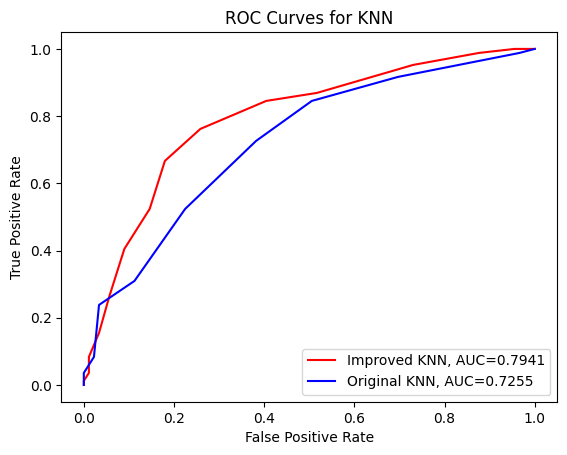

In [ ]:
plt.figure(0).clf()

#Improved Prediction
y_pred_kn1 = kn1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_kn1)
auc = round(metrics.roc_auc_score(y_test, y_pred_kn1), 4)
plt.plot(fpr,tpr,label="Improved KNN, AUC="+str(auc), color='r')

#Original Prediction
y_pred_kn = kn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_kn)
auc = round(metrics.roc_auc_score(y_test, y_pred_kn), 4)
plt.plot(fpr,tpr,label="Original KNN, AUC="+str(auc), color='b')

#create ROC curve
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curves for KNN")

plt.legend(loc='lower right')

- The Improved KNN model has a larger AUC compared to the original KNN model with an AUC of 0.79. It is thus slightly more accurate

# Conclusion

- Implementing upsampling didn't significantly impact the model's accuracy. This is likely due to the only slight imbalance in the target column.
- The improved model without upsampling showed only a slight improvement over the original model. This small improvement could be attributed to various factors, such as the complexity of the dataset or the inherent limitations of the KNN algorithm.